# week4 事前課題２ 住宅価格予測

## 【問題1】練習のために特徴量の選択

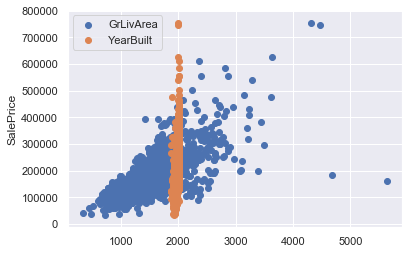

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

#GrLivAreaとYearBuiltを抜き出してください
#House Plice のデータ
train_data = pd.read_csv('train.csv')
#display(train_data.head(3))
X_df = train_data.loc[:,['GrLivArea','YearBuilt']]
y_df = train_data.loc[:,'SalePrice']
#display(X_df)
X = X_df.values
y = y_df.values

plt.scatter(X_df['GrLivArea'],y_df,label="GrLivArea")
plt.scatter(X_df['YearBuilt'],y_df,label="YearBuilt")

plt.ylabel("SalePrice")
plt.legend()



## 【問題2】線形回帰による推定と評価
>データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

In [120]:
#分析、前処理
# y（SalePrice） を標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_std = scaler.fit_transform(y.reshape(1460,1))

# GrLivArea(リビングの広さ)は対数変換 (YearBuiltは年号なので放置)
print(X)
X_log = np.log(X)
print(X_log)

[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[[7.44424865 7.60240134]
 [7.14045304 7.58882988]
 [7.48773376 7.60140233]
 ...
 [7.75790621 7.57095858]
 [6.98286275 7.57558465]
 [7.13568735 7.58324752]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE 0.4122553530594651


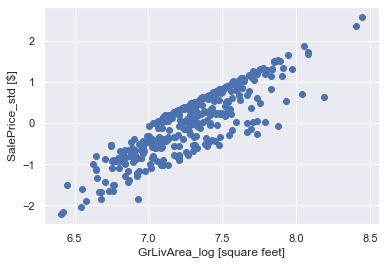

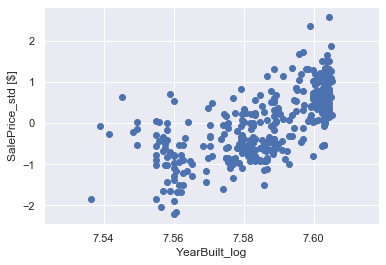

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_std, 
                                                    test_size=0.25)

# 線形回帰
train_and_pred(X_train, y_train, 
               X_test, y_test, 
               model = LinearRegression)

#可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

## 【問題3】手法の比較
>以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

In [122]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix


# def scores(y_test, Y_pred):
#     # Accuracy（正解率） *5nn
#     print("accuracy_score:",accuracy_score(y_test, Y_pred)) # 5-nn
#     # Precision（適合率）
#     print("precision_score:",precision_score(y_test, Y_pred))
#     # Recall（再現率）
#     print("recall_score:",recall_score(y_test, Y_pred))
#     # F値
#     print("f1_score:",f1_score(y_test, Y_pred))
#     # confusion_matrix
#     print("confusion_matrix:",confusion_matrix(y_test, neigh.predict(X_test)))

In [136]:
def Regression_scatter(X_test, Y_pred):
    plt.scatter(X_test[:,0], Y_pred)
    plt.xlabel("GrLivArea_log [square feet]")
    plt.ylabel("SalePrice_std [$]")
    # 説明変数と目的変数のデータ点の散布図をプロット
    plt.grid(True) # グリッド線を表示
    plt.show()
    plt.scatter(X_test[:,1], Y_pred)  
    plt.xlabel("YearBuilt_log")
    plt.ylabel("SalePrice_std [$]")
    # 説明変数と目的変数のデータ点の散布図をプロット
    plt.grid(True)   # グリッド線を表示
    plt.show()

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train_and_pred(X_train, y_train, X_test, y_test, model):
    #model インスタンス化
    m = model()
    #train
    print(m)
    m.fit(X_train, y_train)
    #predict
    Y_pred = m.predict(X_test)
    #scores 関数で評価
    print("MSE",mean_squared_error(y_test, Y_pred))
    #可視化
    Regression_scatter(X_test, Y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE 0.40375675405676165


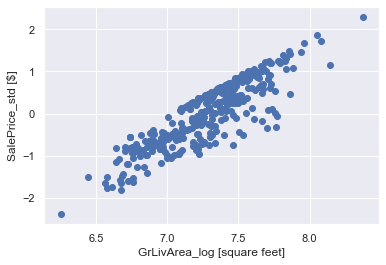

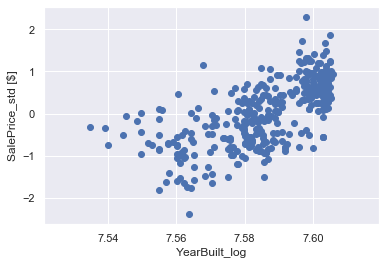

In [142]:
# 線形回帰
train_and_pred(X_train, y_train, 
               X_test, y_test, 
               model = LinearRegression)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
MSE 0.48044803272369696


/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


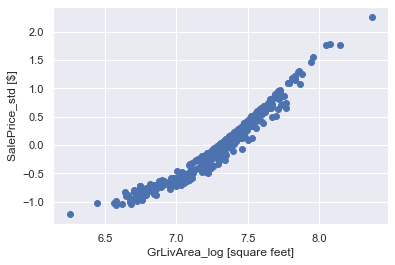

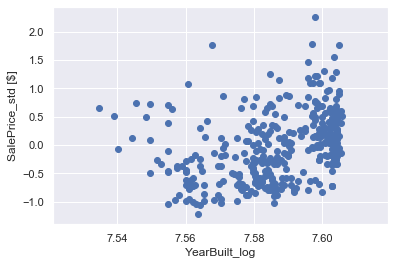

In [143]:
# SVM
train_and_pred(X_train, y_train, 
               X_test, y_test, 
               model = SVR)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
MSE 0.5406766614036771


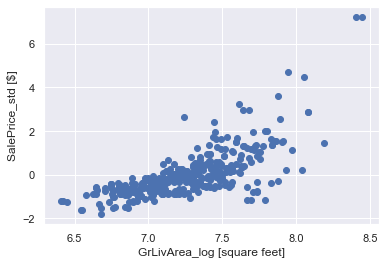

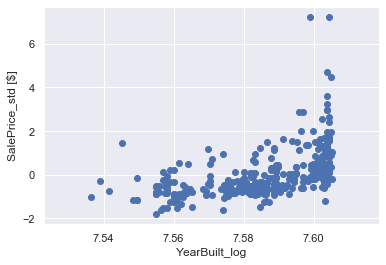

In [149]:
# 決定木
train_and_pred(X_train, y_train, 
               X_test, y_test, 
               model = DecisionTreeRegressor)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
MSE 0.3085035623587988


/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


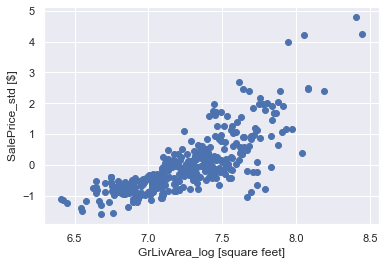

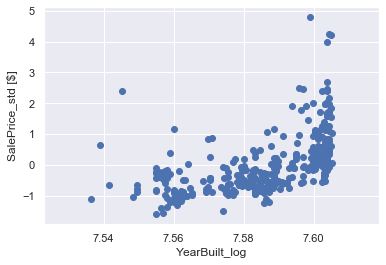

In [151]:
# ランダムフォレスト
train_and_pred(X_train, y_train, 
               X_test, y_test, 
               model = RandomForestRegressor)

（解答）
- 上記のうち、 RandomForest の MSE が最も低く、精度が良いことが示された。
- また、リビングの広さが広いほど住宅価格は上がることが示唆された。一方建築年とではそのような関係が見られなかった。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習